Note that the variables in the houshold problem e, a, are in terms of non-tradable goods. We can convert them to tradable goods by multiplying them by the price of the non-tradable good. Consumption outputs c are in real terms.

In [5]:
%load_ext autoreload
%autoreload 2


import numpy as np
import sys

import matplotlib.pyplot as plt   
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

plt.rcParams.update({"axes.grid" : True, "grid.color": "black", "grid.alpha":"0.25", "grid.linestyle": "--"})
plt.rcParams.update({'font.size': 14})

from IHANKModel import IHANKModelClass
import figures 
import calculations

run_test = False
path = '/Users/emmagundersen/Desktop/Current code/I_HANK_PIG/fig/0403/'
lvl_path = ['U_hh', 'Walras', 'CB', 'i', 'NX', 'CA', 'ra', 'iF_s',  'iF_s']
path_philips= ['WTH', 'WNT', 'NTH', 'NNT', 'PTH', 'PNT', 'PF', 'UC_TH_hh', 'UC_NT_hh', 'EX']
paths = ['PE_s', 'PE', 'YH',  'W', 'P', 'w', 'tau',  'N', 'INC', 'inc',  'CT', 'CNT', 'p', 'E', 'PF_s', 'PF', 'CTH_s', 'i', 'ra', 'iF_s']




The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
model = IHANKModelClass(name='baseline')
model.par.nu = 2.0
model.par.eta_s = 0.5 
model.par.etaF = 0.5
model.par.etaE = 0.1
# model.par.epsilon_ = 0.0 # for homothetic preferences
model.par.float = True
model.par.pf_fixed = False
model.par.mon_policy = 'real'
model.par.phi_inflation = 1.0

model.find_ss(do_print=False)
model.compute_jacs()

shock_PE_s, shock_forigne_interest, shock_PF_s, shock_PF_s_taylor, shock_PE_PF, shock_PE_PF_taylor, shock_i = calculations.difine_shocks(model) 

Share of domestic workers in tradable sector = 0.50


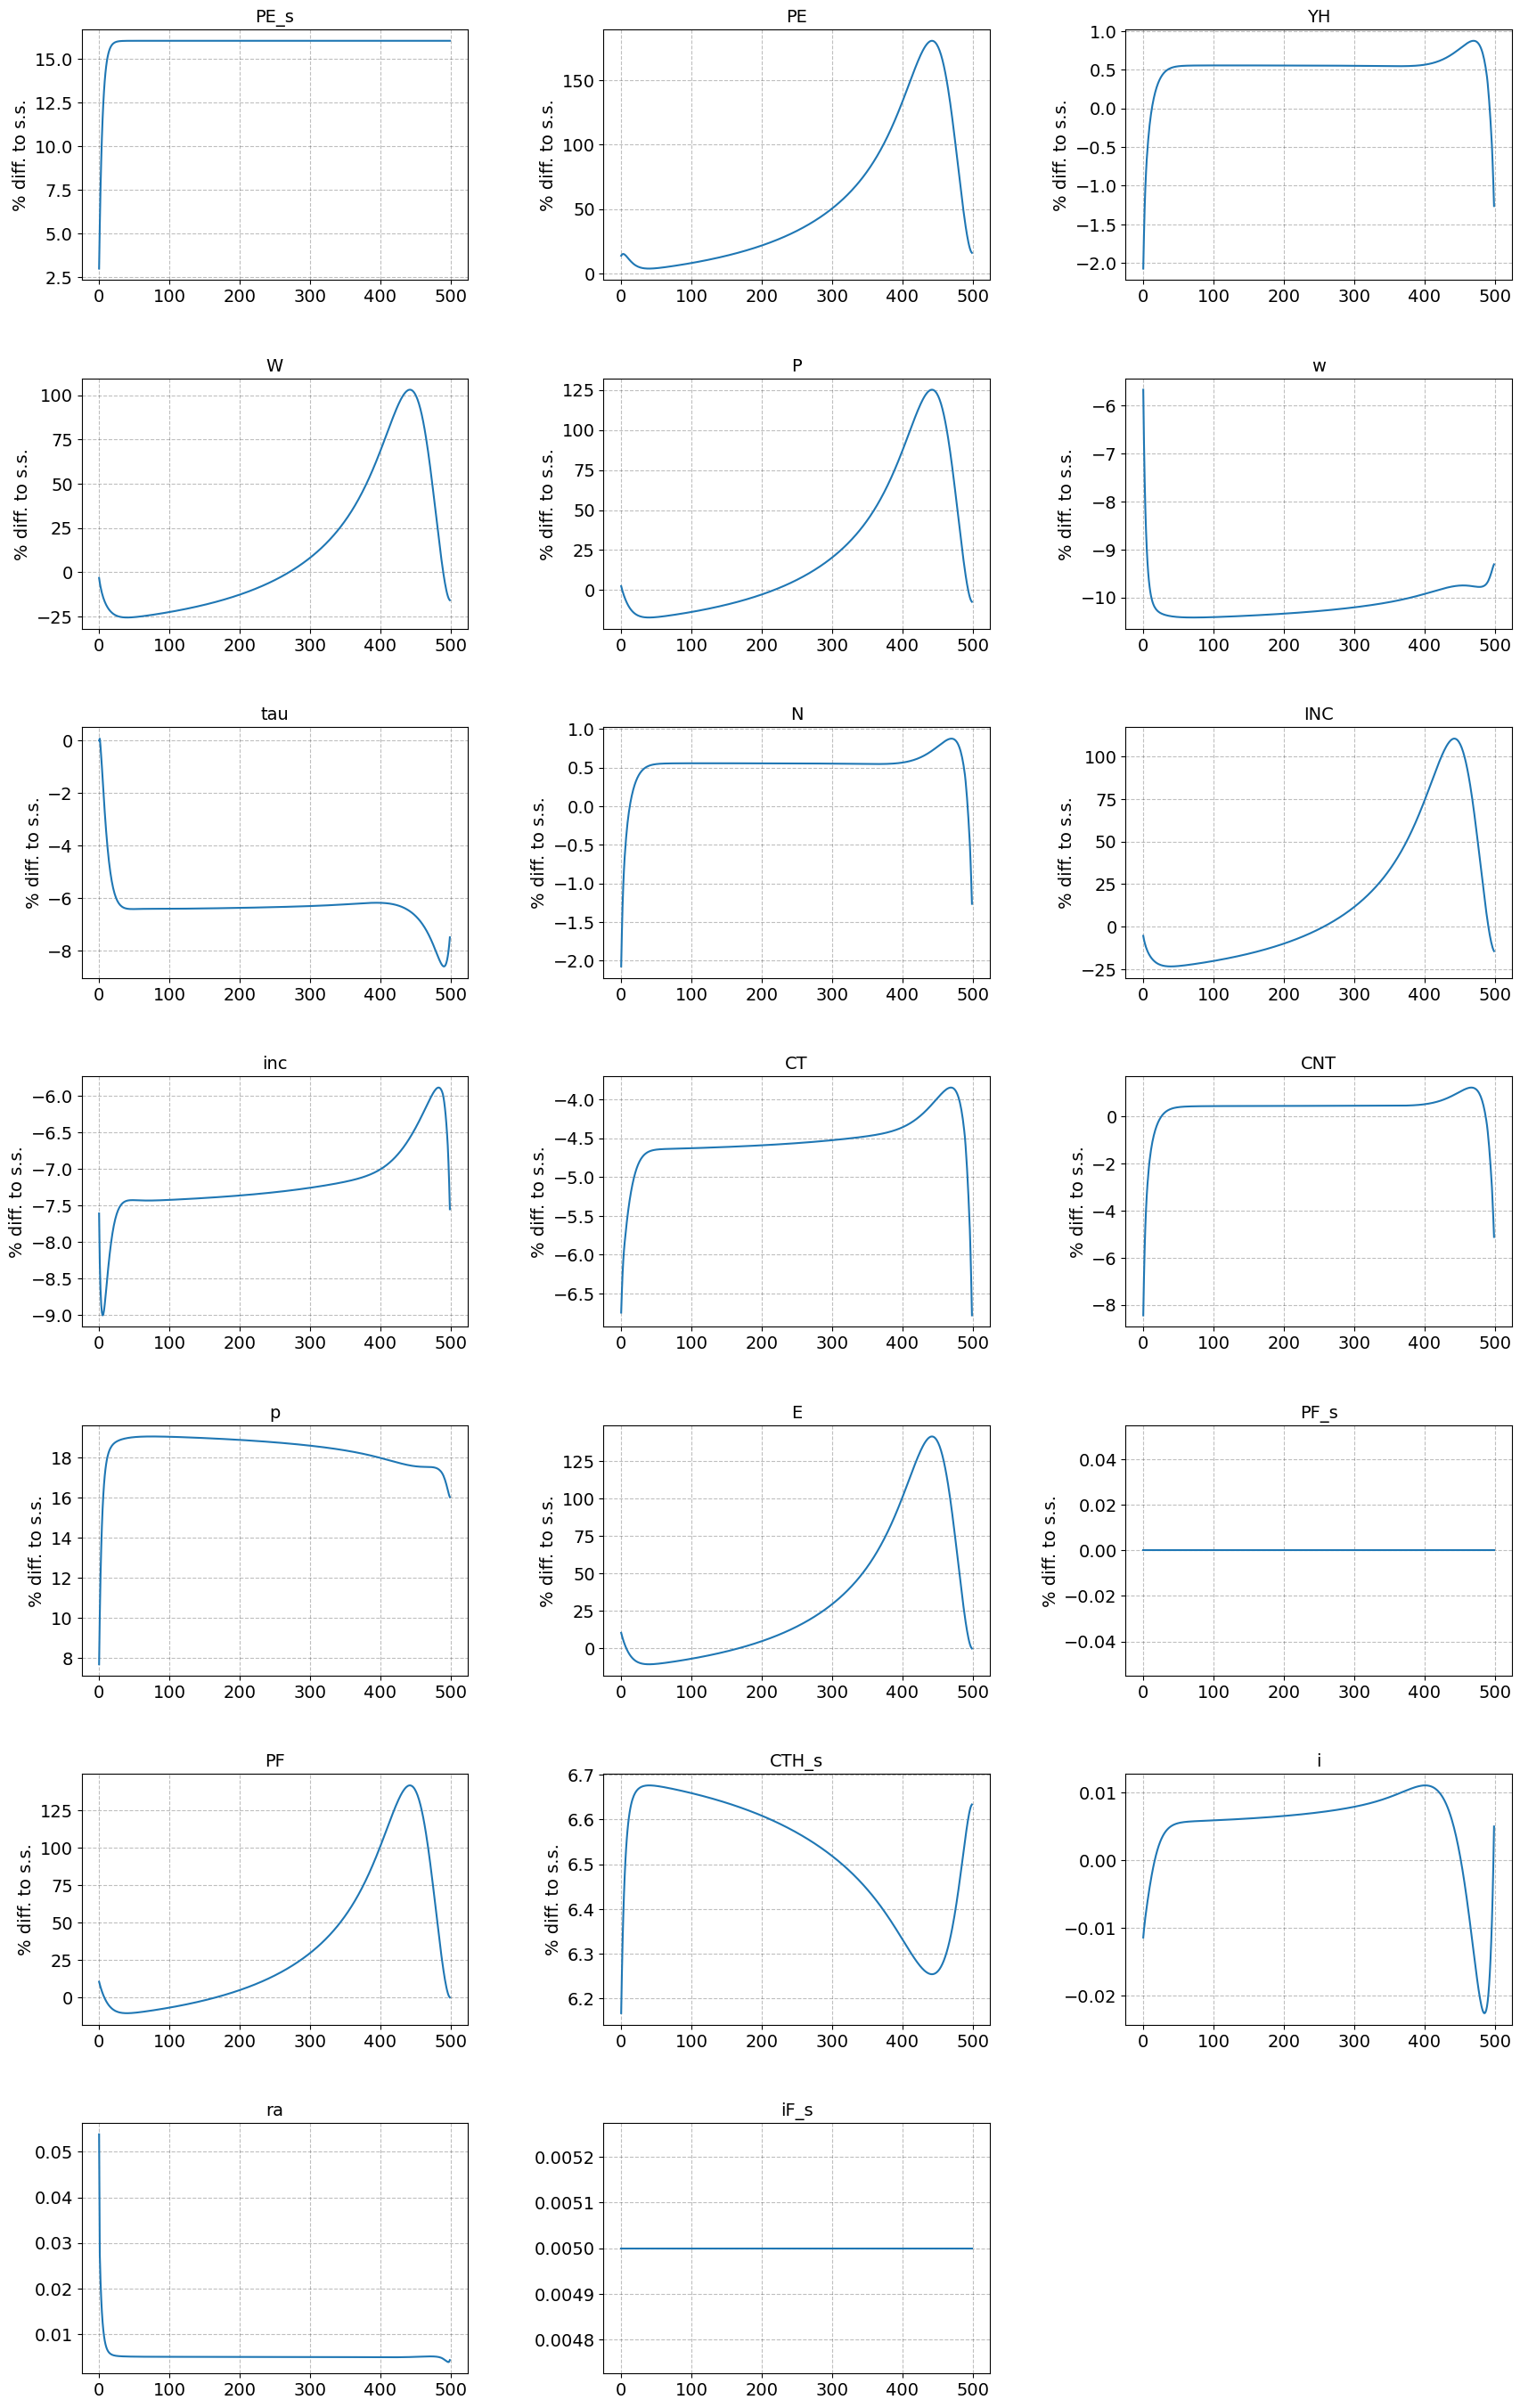

In [6]:

model_float = model.copy(name='Floating exchange rate')

model_float.find_transition_path(shocks=shock_PE_s, do_end_check=False)

model_float.show_IRFs(paths, T_max=500, ncols=3, lvl_value=lvl_path, do_shocks=False, do_targets=False)

In [ ]:
# Expenditure on tradable and non-tradable goods as a function of total expenditure
run_test = True
if run_test:
    a_ = model.ss.a[0,3,:]*model.ss.PNT
    e_ = model.ss.e[0,3,:]*model.ss.PNT
    ect_ = model.ss.ct[0,3,:]*model.ss.PT
    ecnt_ = model.ss.cnt[0,3,:]*model.ss.PNT
    share_ = ect_/(ecnt_+ect_)

    plt.figure()
    plt.plot(e_,share_)
    plt.xlabel('Total expenditure')
    plt.ylabel('Expenditure share tradable goods')
    plt.title('Non-homothetic expenditure shares')
    model.test_hh_path()
    model.test_path()
    model.test_jacs()




In [ ]:
model_fixed = model.copy(name='Fixed exchange rate')
model_fixed.par.float = False
model_fixed.find_ss(do_print=False)
model_fixed.compute_jacs()
model_fixed.find_transition_path(shocks=shock_PE_s, do_end_check=False)

In [ ]:
model_taylor = model.copy(name='taylor rule')
model_taylor.par.float = False
model_taylor.par.mon_policy = 'taylor_OLD'
model_taylor.find_ss(do_print=False)
model_taylor.compute_jacs()
model_taylor.find_transition_path(shocks=shock_PE_s, do_end_check=False)

In [ ]:
models_list = [model_float, model_fixed, model_taylor]
labels = []
for i in models_list:
    labels.append(i.name)
print(labels)

In [ ]:
model_float.compare_IRFs(models=models_list, labels=labels, varnames=paths,  T_max=50, ncols=3, lvl_value=lvl_path, do_shocks=True, do_targets=False)


In [ ]:
model_float.compare_IRFs(models_list, labels, ['PT', 'PNT', 'p'], T_max=50, ncols=3, lvl_value=lvl_path, do_shocks=False, do_targets=False)

In [ ]:
hh_var = ['ra','inc_TH', 'inc_NT', 'p']

models = {'model_float': model_float, 'model_fixed': model_fixed}

inputs_list = [ 'all', ['ra'], ['PTHF'], ['PE'], ['PNT'], ['WNT', 'WTH' ],  ['n_NT','n_TH' ], ['tau']]

model_titles = {
    'model_float': 'Floating exchange rate', 
    'model_PF_s_taylor': 'Price shock forign taylor rule', 
    'model_PF_s_real': 'Price shock forign real rule',
    'model_fixed': 'Model sith fixed E',
    'model_high_etas': 'Model with higher eta s',
    'model_high_etas_T': 'Model with higher eta s and eta F',
    'model': 'Floating exchange rate', 
    'model_fixed': 'Fixed exchange rate'

}


for model_name, model in models.items():

    T_max = 50

    fig = plt.figure(figsize=(3*6,4),dpi=100)
    ax1 = fig.add_subplot(1,3,1)
    ax2 = fig.add_subplot(1,3,2)
    ax3 = fig.add_subplot(1,3,3)

    ax1.set_title('Utility')
    ax2.set_title('CT')
    ax3.set_title('CNT')
    fig.suptitle(f'{model_titles[model_name]}', fontsize=16)

    i_color = 0

    # for use_inputs in [[x] for x in model.inputs_hh]:
    for use_inputs in inputs_list:

        # a. compute
        path_alt = model.decompose_hh_path(do_print=False, use_inputs=use_inputs)

        # b. plot
        if use_inputs is None:
            label = 'No inputs'
            ls = '--'
            color = 'black' 
        elif use_inputs == 'all':
            label = 'All inputs'
            ls = '-'
            color = 'black'
        else:
            label = f'Effect from {use_inputs}'
            # label = f'Only effect from {use_inputs[0]}'
            ls = '-'
            color = f'C{i_color}' # use color index directly
            i_color += 1

        # ax_C_NT.plot((path_alt.U_hh[:T_max] - model.ss.U_hh ) , ls=ls, color=color, label=label)
        ax1.plot((path_alt.U_hh[:T_max] - model.ss.U_hh ) , ls=ls, color=color, label=label)
        ax2.plot((path_alt.CTF_hh[:T_max] - model.ss.CTF_hh ) , ls=ls, color=color, label=label)
        ax3.plot((path_alt.CNT_hh[:T_max] - model.ss.CNT_hh ) , ls=ls, color=color, label=label)

    for ax in [ax1, ax2, ax3]:
        ax.set_ylabel('diff to s.s. abs')
        lgd = ax3.legend(frameon=True, ncol=1, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')

    plt.tight_layout() 
    
    # fig.savefig(f'{path}{model_name}_dec.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.show()
  